In [23]:
import os, sys
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('talk')

import numpy

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import convenient_universal as uconv

In [24]:
%matplotlib inline

In [30]:
def plot_data(model, variable):
    """Get the data"""
    
    inferred = '-'
    if variable == 'hfds':
        long_name = 'Downward Heat Flux at Sea Water Surface '
        if model in ['CanESM2']:
            inferred = '-inferred-'
    
    infile = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/piControl/yr/ocean/r1i1p1/%s/latest/%s%ssum-hemispheric-metrics_Oyr_%s_piControl_r1i1p1_all.nc' %(model, variable, variable, inferred, model)
    
    globe_cube = iris.load_cube(infile, long_name + 'globe sum')
    globe_cube = uconv.convert_to_joules(globe_cube)
    
    nh_cube = iris.load_cube(infile, long_name + 'nh sum')
    nh_cube = uconv.convert_to_joules(nh_cube)
    
    sh_cube = iris.load_cube(infile, long_name + 'sh sum')
    sh_cube = uconv.convert_to_joules(sh_cube)
    
    fig, ax = plt.subplots(figsize=[14, 6])

    iplt.plot(globe_cube, label='globe')
    iplt.plot(nh_cube, label='NH')
    iplt.plot(sh_cube, label='SH')
    plt.legend()
    plt.title(variable + ', ' + model)
    
    print(infile)
    print('GLOBAL mean:', globe_cube.data.mean(), ' cumsum:', numpy.cumsum(globe_cube.data)[-1])
    print('NH mean:', nh_cube.data.mean())
    print('SH mean:', sh_cube.data.mean())
    
    plt.show()

/g/data/r87/dbi599/DRSv2/CMIP5/CanESM2/piControl/yr/ocean/r1i1p1/hfds/latest/hfds-inferred-sum-hemispheric-metrics_Oyr_CanESM2_piControl_r1i1p1_all.nc
GLOBAL mean: 1.33367480808e+20  cumsum: 1.32834010885e+23
NH mean: 1.2025189524e+22
SH mean: -1.18918220432e+22


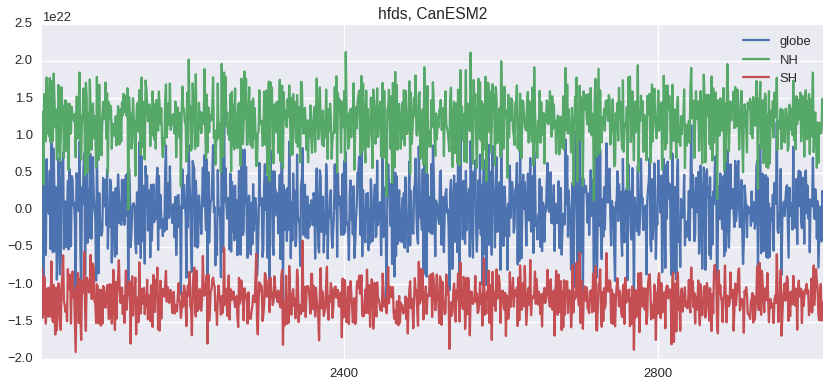

In [31]:
plot_data('CanESM2', 'hfds')

GLOBAL mean: -1.93872066755e+21  cumsum: -9.69360333775e+23
NH mean: -6.18619357365e+21
SH mean: 4.2474729061e+21


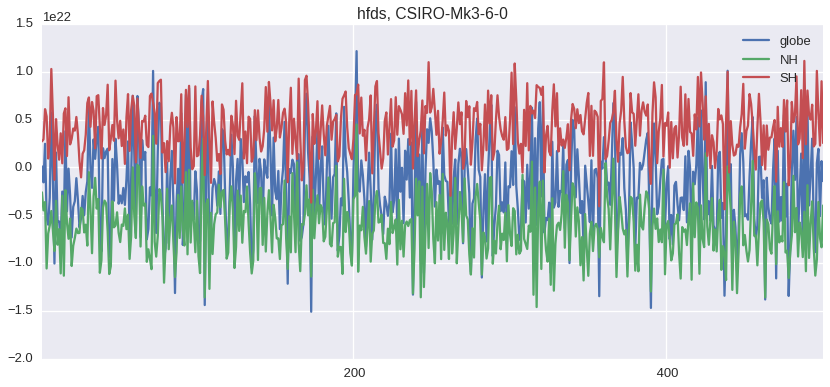

In [29]:
plot_data('CSIRO-Mk3-6-0', 'hfds')